In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from keras.datasets import fashion_mnist

In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_data.shape # shape is 28x28

(10000, 28, 28)

In [ ]:
test_labels.shape

(10000,)

In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

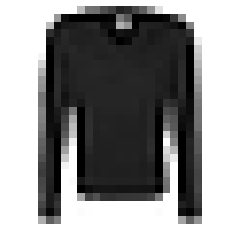

In [ ]:
plt.imshow(train_data[random.randint(0, len(train_data - 1))], cmap="binary")
plt.axis(False)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] # manually defined

In [ ]:
train_data = train_data/255. # scale the pixels
test_data = test_data/255.

In [ ]:
EPOCHS = 20
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # Output is 10 cuz there are 10 categories
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data, 
                        train_labels, 
                        epochs=EPOCHS, 
                        verbose=0)

In [ ]:
def plot_history_curve(history):
  loss = history.history["loss"]
  accuracy = history.history["accuracy"]
  epochs = np.arange(0, len(loss))
  plt.figure(figsize=(20, 7))
  plt.subplot(1, 2, 1)
  plt.title("EPOCHS - LOSS")
  plt.plot(epochs, loss)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.subplot(1, 2, 2)
  plt.title("EPOCHS - ACCURACY")
  plt.plot(epochs, accuracy)
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.show()

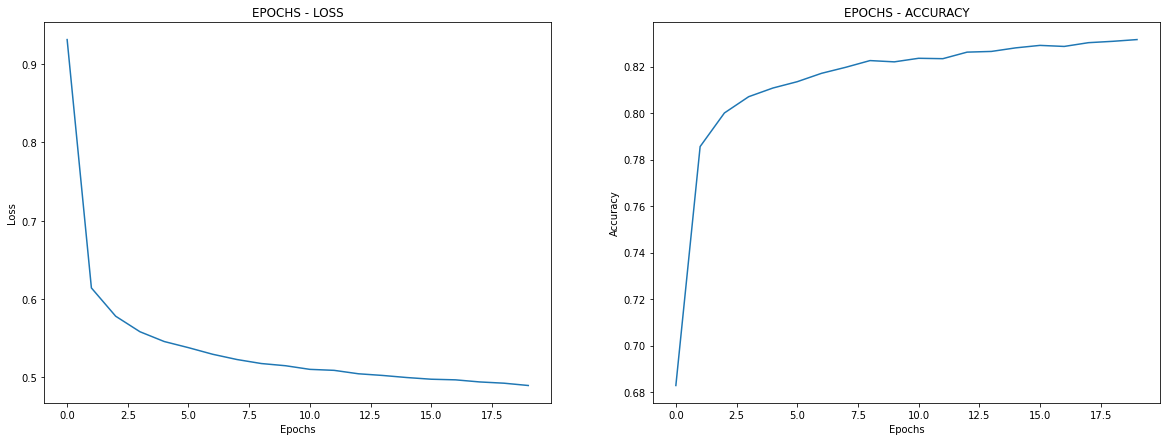

In [ ]:
plot_history_curve(history_1)

In [ ]:
model_1.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5611 - accuracy: 0.8137


[0.5611341595649719, 0.8137000203132629]

## Find out where the optimum learning rate is

In [ ]:
EPOCHS = 20
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # Output is 10 cuz there are 10 categories
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# run every epoch
lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * (10 ** (epoch/20)))

history_2 = model_2.fit(train_data, 
                        train_labels, 
                        epochs=EPOCHS, 
                        validation_data=(test_data, test_labels),
                        callbacks=[lr_callback])

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4788 - accuracy: 0.4306 - val_loss: 1.1389 - val_accuracy: 0.5745 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0267 - accuracy: 0.5996 - val_loss: 0.9668 - val_accuracy: 0.6271 - lr: 0.0011
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8962 - accuracy: 0.6613 - val_loss: 0.8277 - val_accuracy: 0.6946 - lr: 0.0013
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7860 - accuracy: 0.7044 - val_loss: 0.7719 - val_accuracy: 0.7199 - lr: 0.0014
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7368 - accuracy: 0.7250 - val_loss: 0.7584 - val_accuracy: 0.7284 - lr: 0.0016
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7056 - accuracy: 0.7421 - val_loss: 0.7093 - val_accuracy: 0.7511 - lr: 0.0018
Epoch 7/20
1875/1875 [==============================] - 4s

In [ ]:
print(history_2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


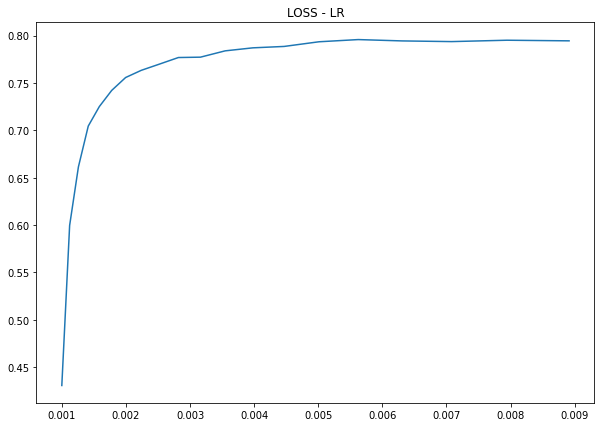

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("LOSS - LR")
plt.plot(history_2.history["lr"], history_2.history["accuracy"])

Conclusion: Drastic accuracy increase was at learning rate of 0.001

In [ ]:
EPOCHS = 20

model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # Output is 10 cuz there are 10 categories
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data, 
                        train_labels, 
                        epochs=EPOCHS, 
                        validation_data=(test_data, test_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5280 - accuracy: 0.4066 - val_loss: 1.1492 - val_accuracy: 0.6089
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8329 - accuracy: 0.7003 - val_loss: 0.6694 - val_accuracy: 0.7611
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6332 - accuracy: 0.7792 - val_loss: 0.6259 - val_accuracy: 0.7842
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6011 - accuracy: 0.7942 - val_loss: 0.6381 - val_accuracy: 0.7725
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5835 - accuracy: 0.8000 - val_loss: 0.6106 - val_accuracy: 0.7844
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5732 - accuracy: 0.8036 - val_loss: 0.5895 - val_accuracy: 0.7957
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5645 - accuracy: 0.8061 - val_loss: 0.5882 - val_accuracy:

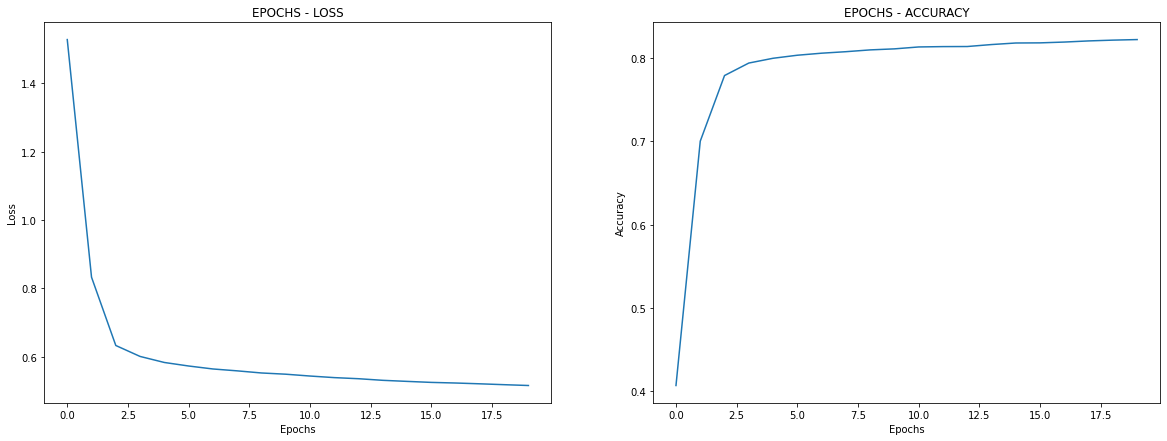

In [ ]:
plot_history_curve(history_3)

In [ ]:
model_3.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.5564 - accuracy: 0.8068


[0.5564436316490173, 0.8068000078201294]

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

In [ ]:
def make_confusion_matrix(model, x, y):
  y_probs = model.predict(x)
  y_preds = y_probs.argmax(axis=1)
  return confusion_matrix(y_true=y, y_pred=y_preds)

In [ ]:
make_confusion_matrix(model_3, test_data, test_labels)

array([[742,   1,   9,  88,   4,   3, 141,   0,  12,   0],
       [  0, 939,   2,  45,  10,   1,   3,   0,   0,   0],
       [ 11,   0, 608,  22, 216,   0, 138,   0,   5,   0],
       [ 30,   9,   9, 853,  36,   5,  52,   0,   6,   0],
       [  2,   3,  85,  30, 784,   2,  81,   0,  13,   0],
       [  0,   0,   0,   3,   0, 910,   1,  42,  17,  27],
       [159,   1,  98,  60, 157,   2, 484,   0,  39,   0],
       [  0,   0,   0,   0,   0,  61,   0, 910,   0,  29],
       [  1,   1,   0,  10,   9,  16,  31,   3, 927,   2],
       [  0,   0,   0,   1,   0,  16,   0,  69,   3, 911]])

In [ ]:
def plot_confusion_matrix(model, x, y_true, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """

  y_probs = model.predict(x)
  y_pred = y_probs.argmax(axis=1)

  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

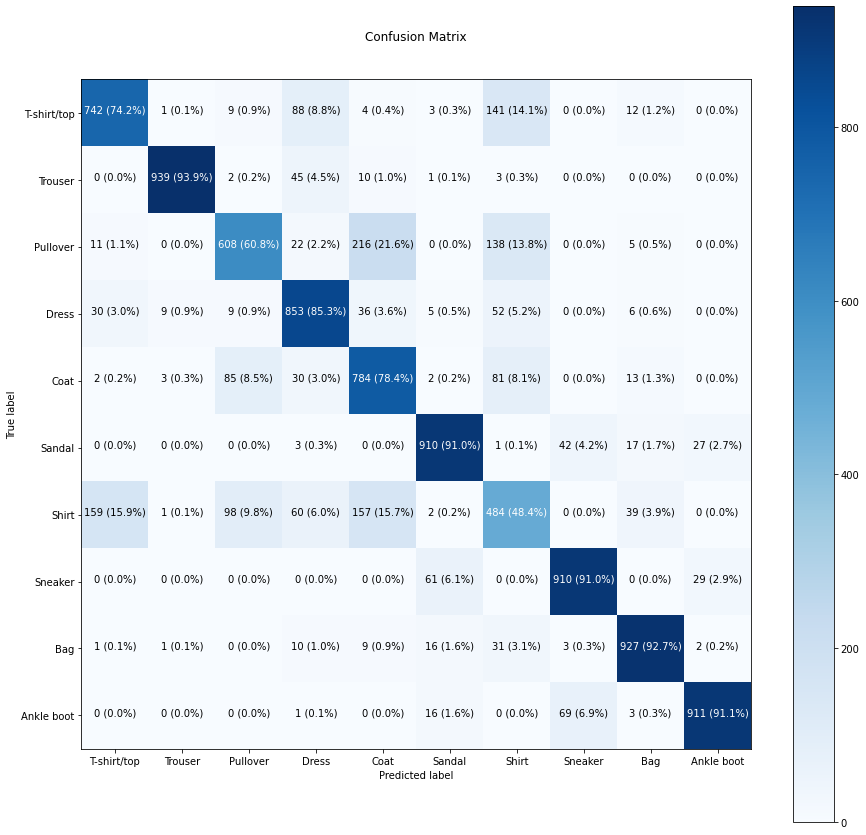

In [ ]:
plot_confusion_matrix(model=model_3,
                      x=test_data,
                      y_true=test_labels,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
    """Picks a random image, plots it and labels it with a predicted and truth label.

    Args:
      model: a trained model (trained on data similar to what's in images).
      images: a set of random images (in tensor form).
      true_labels: array of ground truth labels for images.
      classes: array of class names for images.
    
    Returns:
      A plot of a random image from `images` with a predicted class label from `model`
      as well as the truth class label from `true_labels`.
    """ 
    # Setup random integer
    i = random.randint(0, len(images))
    
    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the target image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
      color = "green"
    else:
      color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
                                                    color=color) # set the color to green or red

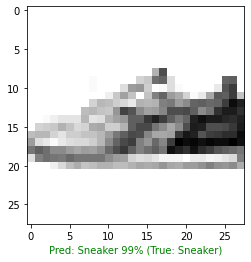

In [ ]:
plot_random_image(model_3, test_data, test_labels, class_names)